# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

Dandiset 001333, titled "Parkinson's Electrophysiological Signal Dataset (PESD)", contains electrophysiological signals from both healthy and parkinsonian subjects (simulated). The dataset description indicates that it includes two main types of signals:

*   **Beta Average Rectified Voltage (ARV):** Signals in the frequency domain, representing the ARV of the beta band (13-30 Hz).
*   **Local Field Potential (LFP) - STN:** Signals in the time domain, derived from the synchronized activity of neuron populations between the cortex, Subthalamic Nucleus (STN), and thalamus.

The Dandiset aims to provide data where parkinsonian signals (from simulated subjects) show a relatively high power density in the beta frequency (13-30 Hz). Elevated beta band activity in the STN is a well-established neural biomarker associated with motor symptoms in Parkinson's Disease. This dataset allows for the exploration of these characteristic signals.

You can find more information about this Dandiset and access it at the DANDI Archive:
[https://dandiarchive.org/dandiset/001333/0.250327.2220](https://dandiarchive.org/dandiset/001333/0.250327.2220)

## What this notebook covers

This notebook will guide you through the following steps:

1.  **Listing required packages:** Identifying the Python libraries needed to run the notebook.
2.  **Loading the Dandiset:** Using the DANDI API to connect to the DANDI Archive and access Dandiset 001333.
3.  **Exploring an NWB file:**
    *   Loading a specific Neurodata Without Borders (NWB) file from the Dandiset.
    *   Displaying basic metadata from the NWB file.
    *   Summarizing the contents of the NWB file.
    *   Providing a link to explore the NWB file interactively using Neurosift.
4.  **Visualizing data:**
    *   Loading and plotting example data (Beta Band Voltage) from the NWB file.
5.  **Summary and Future Directions:** Briefly summarizing the findings and suggesting potential next steps for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed:

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for working with NWB files)
*   `h5py` (dependency for `pynwb` for HDF5 file access)
*   `remfile` (for streaming remote files)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting styles)
*   `itertools` (used for iterating through assets)
*   `pandas` (for displaying tabular data like electrode information, if needed later)

This notebook assumes these packages are already installed in your Python environment.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001333"
dandiset_version = "0.250327.2220"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
# Full metadata can be extensive, so we'll print selected fields if available
# The get_raw_metadata() method on the Dandiset object can provide more details
raw_metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {raw_metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {raw_metadata.get('url', f'https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}')}")
if 'description' in raw_metadata:
    print(f"Dandiset description: {raw_metadata['description'][:200]}...") # Print first 200 chars

# List some assets in the Dandiset
assets_iterator = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets_iterator, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Use asset.identifier

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220
Dandiset description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power ...

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## Exploring an NWB File

Now, let's load one of the NWB files from the Dandiset and examine its contents.

We will be working with the following NWB file:
`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb`

The URL for this specific asset is obtained by combining the DANDI API base URL for assets with the asset's unique ID. For the chosen file (asset ID: `b344c8b7-422f-46bb-b016-b47dc1e87c65`), the direct download URL is:
`https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/`

In [2]:
import pynwb
import h5py
import remfile
import pandas as pd # For DataFrame display

# URL of the NWB file chosen for exploration
nwb_asset_url = "https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/"
nwb_asset_path = "sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb" # For reference

print(f"Loading NWB file from: {nwb_asset_url}")

# Load the NWB file using remfile for streaming
# It's good practice to wrap file operations in try/finally to ensure files are closed
remote_f = remfile.File(nwb_asset_url)
h5_f = h5py.File(remote_f, 'r') # Ensure read-only mode
nwb_io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True) # mode='r' and load_namespaces
nwbfile = nwb_io.read()

print("\nSuccessfully loaded the NWB file.")
print(f"NWBFile Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
if nwbfile.experimenter:
    print(f"Experimenter(s): {', '.join(nwbfile.experimenter)}")
if nwbfile.related_publications:
    print(f"Related Publications: {', '.join(nwbfile.related_publications)}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/



Successfully loaded the NWB file.
NWBFile Identifier: 7a68ea11-865a-481a-a5fd-d91fe6def653
Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session Start Time: 2025-03-27 16:53:27.990500-04:00
Experimenter(s): Ananna Biswas
Related Publications: https://arxiv.org/abs/2407.17756, DOI: 10.3389/fnins.2020.00166


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Summary of the NWB File Contents

The NWB file format organizes data hierarchically. Let's look at some key components present in this specific file:

*   **`session_description`**: Provides a brief description of the session.
*   **`identifier`**: A unique identifier for the NWB file.
*   **`session_start_time`**: The start time of the recording session.
*   **`experimenter`**: Name(s) of the experimenter(s).
*   **`keywords`**: Keywords associated with the data (e.g., 'ecephys', 'LFP').
*   **`processing`**: Contains processed data modules. In this file, there's an `ecephys` module.
    *   **`ecephys` Processing Module**:
        *   **`LFP` (LFP data interface)**: Contains Local Field Potential data.
            *   **`Beta_Band_Voltage` (ElectricalSeries)**: This stores the LFP data filtered for the beta band. It includes:
                *   `data`: The voltage values.
                *   `timestamps`: The time points corresponding to the data values.
                *   `unit`: The unit of the data (e.g., 'volts').
                *   `electrodes`: A reference to the electrodes used for this series.
*   **`electrodes` (Table)**: Information about the electrodes used in the recording, such as their location, group, and label.
*   **`electrode_groups`**: Defines groups of electrodes. In this dataset, these are often referred to as 'shanks' (e.g., 'shank0', 'shank1', 'shank2', 'shank3'). Each shank can be thought of as a component of a multi-electrode probe, potentially targeting different sub-regions or depths. The `nwb-file-info` output indicated these are simulated electrode groups within a "Simulated Cortico-basal-ganglia network of brain."
*   **`subject`**: Information about the subject, such as age, sex, species, and subject ID. This is crucial for understanding the context of the data (e.g., healthy vs. parkinsonian simulation).

We can explore some of these fields. For example, let's look at the electrode table and subject information:

In [3]:
if nwbfile.electrodes is not None:
    print("Electrode Table:")
    # Displaying as a Pandas DataFrame for better readability
    electrodes_df = nwbfile.electrodes.to_dataframe()
    print(electrodes_df.head())
else:
    print("No electrode table found in this NWB file.")

if "ecephys" in nwbfile.processing and "LFP" in nwbfile.processing["ecephys"].data_interfaces:
    lfp_interface = nwbfile.processing["ecephys"].data_interfaces["LFP"]
    if "Beta_Band_Voltage" in lfp_interface.electrical_series:
        beta_series = lfp_interface.electrical_series["Beta_Band_Voltage"]
        print(f"\nFound ElectricalSeries: 'Beta_Band_Voltage'")
        print(f"  Description: {beta_series.description}")
        print(f"  Unit: {beta_series.unit}")
        print(f"  Data shape: {beta_series.data.shape}")
        print(f"  Timestamps shape: {beta_series.timestamps.shape}")
    else:
        print("\n'Beta_Band_Voltage' ElectricalSeries not found under LFP.")
else:
    print("\n'LFP' data interface or 'ecephys' processing module not found.")

Electrode Table:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeGroup at 0x12932...     shank0  shank0_elec0  
1   shank0 pynwb.ecephys.ElectrodeGroup at 0x12932...     shank0  shank0_elec1  
2   shank0 pynwb.ecephys.ElectrodeGroup at 0x12932...     shank0  shank0_elec2  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x12932...     shank1  shank1_elec0  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x12932...     shank1  shank1_elec1  

Found ElectricalSeries

### Subject Information

The NWB file also contains metadata about the subject from which the data was recorded (or, in this case, simulated).

In [4]:
if nwbfile.subject is not None:
    print("Subject Information:")
    print(f"  Subject ID: {nwbfile.subject.subject_id}")
    print(f"  Species: {nwbfile.subject.species}")
    print(f"  Sex: {nwbfile.subject.sex}")
    print(f"  Age: {nwbfile.subject.age}")
    print(f"  Description: {nwbfile.subject.description}")
else:
    print("No subject information found in this NWB file.")

Subject Information:
  Subject ID: healthy-simulated-beta
  Species: Homo sapiens
  Sex: U
  Age: P0D
  Description: This is a simulated dataset generated from a computational model.


### Explore with Neurosift

You can explore this NWB file interactively using Neurosift, a web-based tool for visualizing neurophysiology data.

[Click here to open this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/&dandisetId=001333&dandisetVersion=0.250327.2220)

*(Note: The `dandisetVersion` in the Neurosift URL is set to the version of the Dandiset we are using. If you are exploring a different version, update it accordingly.)*

## Visualizing Data from the NWB File

Let's visualize the "Beta_Band_Voltage" electrical series we identified earlier. This involves plotting the voltage data against its corresponding timestamps.

Plotting Beta_Band_Voltage data (shape: (1400,)) vs. timestamps (shape: (1400,))


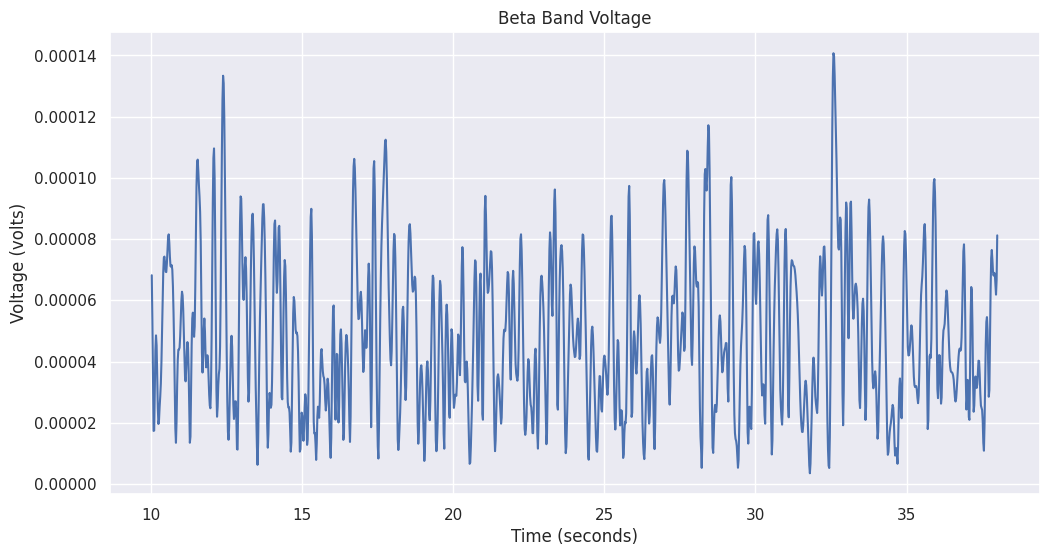

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For potential data manipulation if needed

# Access the Beta_Band_Voltage ElectricalSeries
try:
    beta_series = nwbfile.processing["ecephys"]["LFP"].electrical_series["Beta_Band_Voltage"]

    # Load data and timestamps
    # For large datasets, consider loading only a subset
    # e.g., data = beta_series.data[:10000]
    #       timestamps = beta_series.timestamps[:10000]
    data = beta_series.data[:]
    timestamps = beta_series.timestamps[:]

    print(f"Plotting Beta_Band_Voltage data (shape: {data.shape}) vs. timestamps (shape: {timestamps.shape})")

    # Create the plot
    sns.set_theme() # Apply seaborn styling
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, data)
    plt.xlabel(f"Time ({beta_series.timestamps_unit})")
    plt.ylabel(f"Voltage ({beta_series.unit})")
    plt.title("Beta Band Voltage")
    plt.grid(True)
    plt.show()

except KeyError:
    print("Could not find 'Beta_Band_Voltage' in the NWB file as expected.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")

The plot above shows the fluctuations in the beta band voltage over time. This visualization provides a direct look at the LFP signal after it has been processed to isolate the beta frequency range. We can observe the oscillatory nature of the signal.

## Summary and Future Directions

This notebook demonstrated how to:

*   Connect to the DANDI Archive and retrieve information about Dandiset 001333.
*   Load a specific NWB file (`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb`) from the Dandiset.
*   Inspect basic metadata and structure of the NWB file.
*   Visualize time-series data (Beta Band Voltage) from the NWB file.

### Possible Future Directions:

1.  **Comparative Analysis:** Load and compare data from "healthy" and "parkinsonian" simulated subjects within the Dandiset, if available and clearly delineated.
2.  **Spectral Analysis:** Perform spectral analysis (e.g., Power Spectral Density) on the LFP data to quantify power in different frequency bands, particularly the beta band.
3.  **Feature Extraction:** Extract features from the Beta ARV signals (if these are indeed distinct and accessible in other files) or the LFP signals that might be relevant for distinguishing between healthy and parkinsonian states, as described in the Dandiset's context.
4.  **Explore Other NWB Files:** The Dandiset contains multiple NWB files. A similar exploratory process can be applied to other files to understand the variability or commonalities across different simulated sessions or subjects.
5.  **Investigate ARV Signals:** The Dandiset description mentions "Beta Average Rectified Voltage (ARV)" signals. Further exploration could focus on locating these signals within the NWB files (they might be in different `ElectricalSeries` objects or processed differently) and analyzing them.

Remember to consult the [NWB documentation](https://pynwb.readthedocs.io/en/stable/) and the [DANDI Archive](https://dandiarchive.org/) for more detailed information on working with these tools and data formats.

### Closing Resources

After you are done with the NWB file, you can close the I/O object.

In [6]:
# It's good practice to close the NWBHDF5IO object and the underlying h5py.File and remfile.File
# This is especially important if you are opening many files in a loop.
try:
    nwb_io.close() # Closes the NWBHDF5IO and the h5py.File if it was opened by NWBHDF5IO
    # If remfile.File needs explicit closing and isn't handled by h5py.File, you'd close it too.
    # However, h5py often takes ownership or remfile manages its lifecycle.
    # For this example, closing nwb_io should be sufficient.
    # If h5_f was opened separately or remote_f needed independent closing:
    # h5_f.close() # if not closed by nwb_io.close()
    # remote_f.close() # if remfile needs explicit closing
    print("NWB I/O resources closed.")
except NameError:
    print("NWB I/O objects were not defined (perhaps loading failed).")
except Exception as e:
    print(f"Error closing NWB I/O resources: {e}")

NWB I/O resources closed.
